In [127]:
from sqlite_helper import *
conn_1 = create_connection("main.db")
conn_2 = create_connection("temp.db")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
sql_show_tables = """SELECT name FROM sqlite_master  
WHERE type='table'"""
res = execute_sql_statement(sql_show_tables,conn_1)
print(res)

[('airlines',), ('raw_data',), ('airports',), ('routes',), ('sqlite_sequence',), ('flights',)]


In [129]:
sql_stmt = """with delay_analysis as (with routes_modified as (SELECT r.Source || '-' || r.Destination as route,
f.Distance as dist, f.DepDelayMinutes as delay FROM flights f 
inner join routes r on f.RouteID = r.RouteID order by delay desc)
SELECT
  route,
  dist,
  sum(delay) as total_delay,
  COUNT(route) AS occurences

FROM
  routes_modified

GROUP BY 
  route

ORDER BY
  occurences DESC
  
Limit 20)

select * from delay_analysis
order by occurences desc
"""
res = execute_sql_statement(sql_stmt, conn_1)
res = pd.DataFrame(res, columns=['Route', 'Distance', 'Total Departure Delay', 'Frequency'])
res

,Route,Distance,Total Departure Delay,Frequency
0,LAX-SFO,337.0,178477.0,16162
1,SFO-LAX,337.0,163440.0,16150
2,LAX-LAS,236.0,179767.0,14628
3,LAS-LAX,236.0,208210.0,14603
4,HNL-OGG,100.0,80331.0,13922
5,OGG-HNL,100.0,101176.0,13914
6,LGA-ORD,733.0,199590.0,13427
7,ORD-LGA,733.0,201142.0,13423
8,LAX-JFK,2475.0,202558.0,13134
9,JFK-LAX,2475.0,200310.0,13123


In [130]:
res.sort_values('Total Departure Delay', ascending = False)

,Route,Distance,Total Departure Delay,Frequency
3,LAS-LAX,236.0,208210.0,14603
8,LAX-JFK,2475.0,202558.0,13134
7,ORD-LGA,733.0,201142.0,13423
9,JFK-LAX,2475.0,200310.0,13123
6,LGA-ORD,733.0,199590.0,13427
12,DEN-PHX,602.0,199275.0,11970
16,MCO-ATL,404.0,191083.0,11876
2,LAX-LAS,236.0,179767.0,14628
17,ATL-MCO,404.0,179742.0,11820
0,LAX-SFO,337.0,178477.0,16162


In [131]:
res.sort_values('Distance', ascending = False)

,Route,Distance,Total Departure Delay,Frequency
8,LAX-JFK,2475.0,202558.0,13134
9,JFK-LAX,2475.0,200310.0,13123
6,LGA-ORD,733.0,199590.0,13427
7,ORD-LGA,733.0,201142.0,13423
12,DEN-PHX,602.0,199275.0,11970
15,PHX-DEN,602.0,156311.0,11895
19,FLL-ATL,581.0,162805.0,11421
18,ATL-FLL,581.0,163691.0,11471
17,ATL-MCO,404.0,179742.0,11820
16,MCO-ATL,404.0,191083.0,11876


In [132]:
# Standardization

In [133]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Route                  20 non-null     object 
 1   Distance               20 non-null     float64
 2   Total Departure Delay  20 non-null     float64
 3   Frequency              20 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 768.0+ bytes


In [134]:
res.describe()

,Distance,Total Departure Delay,Frequency
count,20.000000,20.000000,20.000000
mean,599.600000,163271.500000,13048.500000
std,671.682914,41299.038026,1467.383762
min,100.000000,79096.000000,11421.000000
25%,236.000000,153301.750000,11913.750000
50%,401.500000,174627.500000,12612.500000
75%,602.000000,199353.750000,13916.000000
max,2475.000000,208210.000000,16162.000000


In [142]:
res.corr()

,Distance,Total Departure Delay,Frequency
Distance,1.000000,0.494514,-0.072943
Total Departure Delay,0.494514,1.000000,0.103006
Frequency,-0.072943,0.103006,1.000000


<AxesSubplot:>

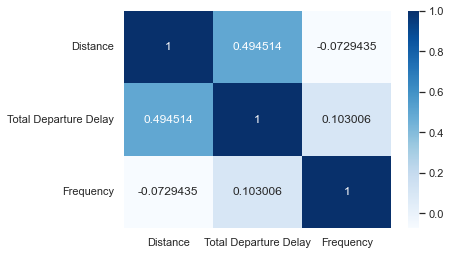

In [136]:
sns.heatmap(res.corr(), annot=True, fmt="g", cmap='Blues')

c:\Users\arnav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Departure Delay'>

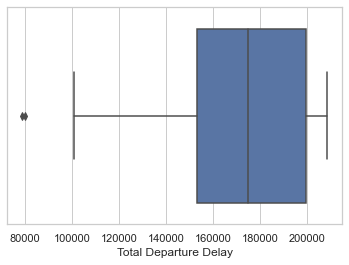

In [137]:
sns.boxplot(res['Total Departure Delay'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


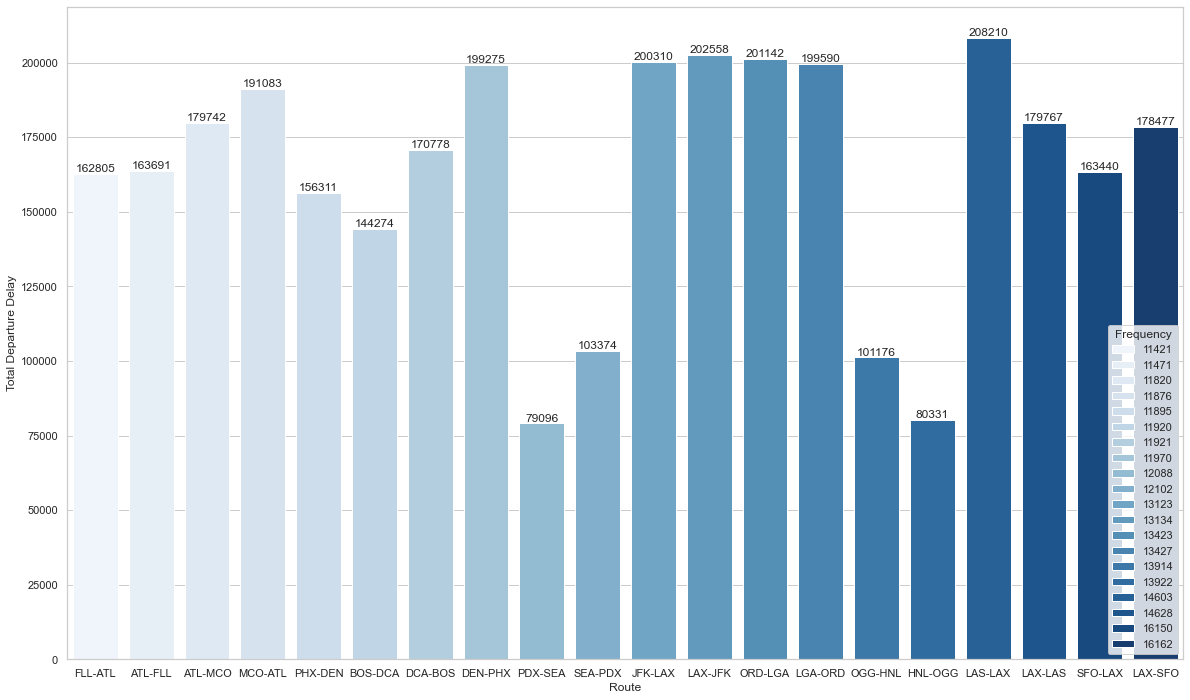

In [144]:
res.sort_values(by = 'Frequency', inplace=True)
plt.figure(figsize=(20,12))
plt.legend(loc='upper right')
sns.set(style="whitegrid", color_codes=True)
ax = sns.barplot(x = res['Route'], y = res['Total Departure Delay'], hue=res['Frequency'], dodge = False, palette='Blues')
sns.move_legend(ax, "lower right")

for i in ax.containers:
    ax.bar_label(i,)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


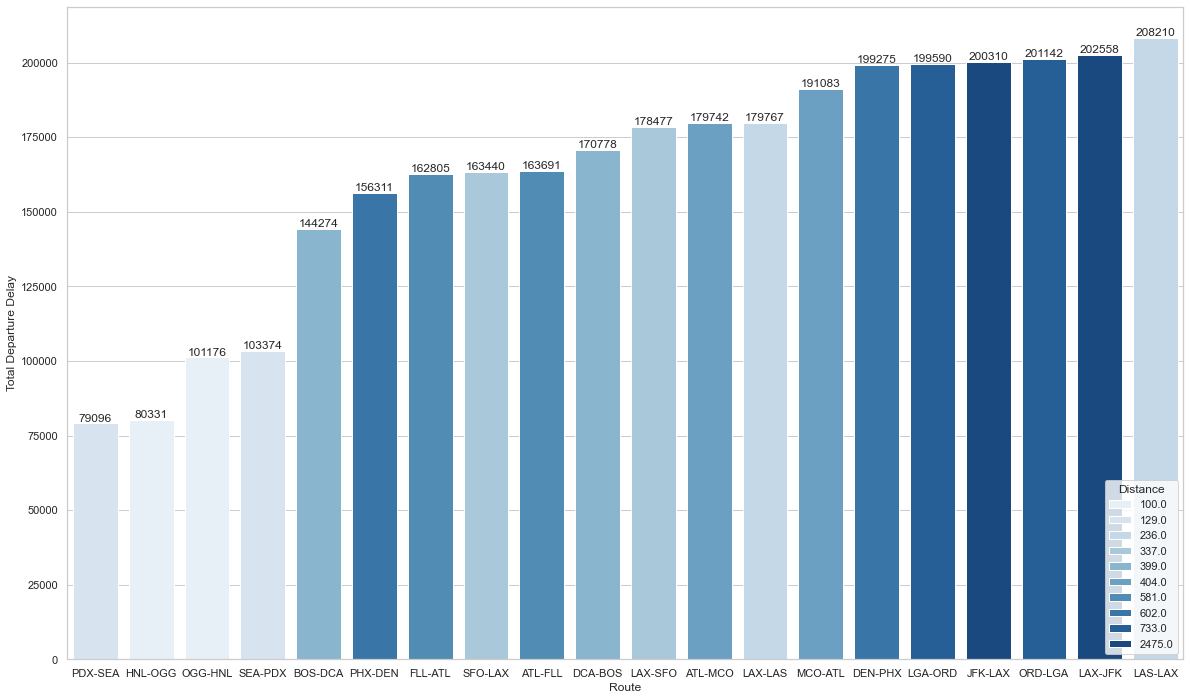

In [140]:
res.sort_values(by = 'Total Departure Delay', inplace=True)
plt.figure(figsize=(20,12))
plt.legend(loc='upper right')
sns.set(style="whitegrid", color_codes=True)
ax = sns.barplot(x = res['Route'], y = res['Total Departure Delay'], hue=res['Distance'], dodge = False, palette='Blues')
sns.move_legend(ax, "lower right")

for i in ax.containers:
    ax.bar_label(i,)

### Conclusion

We observe that there is a considerably high correlation between Total Departure Delay (in minutes) and Distance (in miles) with a pearson's correlation coefficient value of 0.49. One of the outliers in this analysis is the LAS-LAX route which has the highest Total Departure Delay even though the Distance is quite less. This could be because LAX and LAS happen to be two of the busiest airports in the US. In fact, the LAX airport is the second busiest airport behind Atlanta which explains why it constantly features in the routes with the highest Total Departure Delay. Another outlier is the PHX-DEN route which has a lower than expected Total Departure Delay even though the distance is quite high. Interestingly, the reverse route (DEN-PHX route) has a Total Departure Delay which is close to what we expect. A possible reason for this could be that the departure delay is being caused because of the DEN airport being a lot busier than the PHX airport.

Another thing to point out is that the boxplot of the Total Departure Delay is left skewed indicating that bulk of the observations are quite large, with a few observations that are much smaller than the rest. This can be confirmed by looking at the bar plot above which indicates the same trend. Also, there happen to be two outliers in the boxplot associated with the PDX-SEA and HNL-OGG routes which correspond to a very high drop off in the Total Departure Delay. Again, this can be confirmed by observing the bar plot above.